In [1]:
import os
print(os.listdir('Fer2013EasyData'))

['.DS_Store', 'test', 'train']


In [2]:
train_path = 'Fer2013EasyData/train'
test_path =  'Fer2013EasyData/test'

In [3]:
import matplotlib.pyplot as plt
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers

In [5]:
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)

['.DS_Store', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [6]:
batch_size = 64
target_size = (48,48)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
input_shape = (48,48,1) # img_rows, img_colums, color_channels
num_classes = 7

In [8]:
# Build Model
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=input_shape)) #, data_format='channels_last', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                    

In [9]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [10]:
num_epochs = 50
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_TEST   = test_generator.n//test_generator.batch_size

In [11]:
# Train Model
history = model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, verbose=1, validation_data=test_generator, validation_steps=STEP_SIZE_TEST)

Epoch 1/50
448/448 [==============================] - 322s 717ms/step - loss: 1.7988 - accuracy: 0.2601 - val_loss: 1.6710 - val_accuracy: 0.3294
Epoch 2/50
448/448 [==============================] - 283s 631ms/step - loss: 1.5388 - accuracy: 0.3999 - val_loss: 1.4190 - val_accuracy: 0.4521
Epoch 3/50
448/448 [==============================] - 217s 483ms/step - loss: 1.3514 - accuracy: 0.4823 - val_loss: 1.3326 - val_accuracy: 0.4869
Epoch 4/50
448/448 [==============================] - 217s 485ms/step - loss: 1.2134 - accuracy: 0.5399 - val_loss: 1.2522 - val_accuracy: 0.5206
Epoch 5/50
448/448 [==============================] - 223s 498ms/step - loss: 1.0807 - accuracy: 0.5955 - val_loss: 1.2087 - val_accuracy: 0.5480
Epoch 6/50
448/448 [==============================] - 216s 483ms/step - loss: 0.9412 - accuracy: 0.6475 - val_loss: 1.2153 - val_accuracy: 0.5572
Epoch 7/50
448/448 [==============================] - 216s 482ms/step - loss: 0.7731 - accuracy: 0.7167 - val_loss: 1.3222 -

In [12]:
# Save Model
models.save_model(model, 'fer2013_cnn.h5') 

In [13]:
# Evaluate Model
score = model.evaluate(test_generator, steps=STEP_SIZE_TEST) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

112/112 [==============================] - 12s 105ms/step - loss: 3.7716 - accuracy: 0.5505
Test loss:  3.7716212272644043
Test accuracy:  0.5505022406578064


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


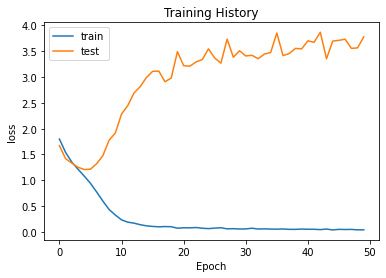

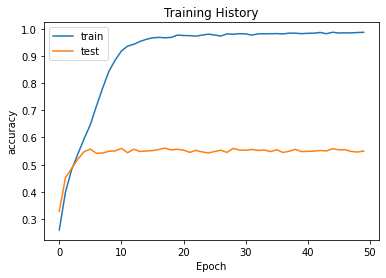

In [14]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

In [1]:
# Load Model
from tensorflow import keras
saved_model = keras.models.load_model('fer2013_cnn.h5')

In [15]:
# Add this image to the same folder as usual
from PIL import Image
import numpy as np
from skimage import transform
import matplotlib.pyplot as plt
def load(filename):
    np_image = Image.open(filename) # Filename of Image
    np_image = np.array(np_image).astype('int')/255
    np_image = transform.resize(np_image, (48, 48, 1))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

In [23]:
image_name = 'external-content.duckduckgo.jpg' # Filename of Image
image = load(image_name) 

In [24]:
emotion_labels_loaded = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
print('This image is ' + emotion_labels_loaded[np.argmax(saved_model.predict(image))])

This image is happy


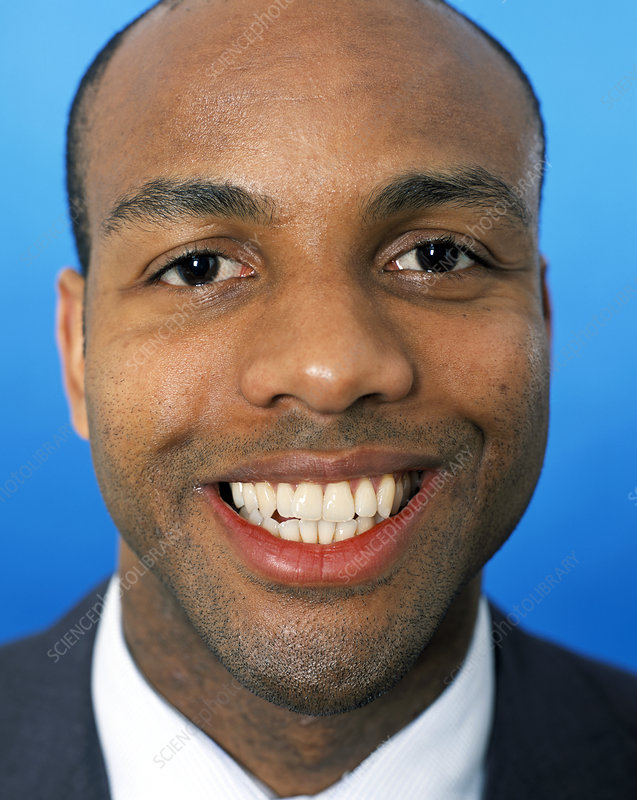

In [25]:
Image.open(image_name)